In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from datetime import timedelta
# if using a Jupyter notebook, includue:
%matplotlib inline

import sys

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('kanjanaphisek_bangkok_pm25.csv')
df
df.rename(columns={'UTC Hour':'Hour'}, inplace=True)
df.head()

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,62.9,1,0
1,2016,3,3,9,62.9,1,0
2,2016,3,3,10,55.5,1,0
3,2016,3,3,11,55.5,1,0
4,2016,3,3,12,47.9,1,0


In [4]:
df['datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']]) + pd.Timedelta(hours=7) # UTC to Bangkok time
df.index = df['datetime']
df.Hour = df.index.hour # UTC hour to UTC+7
df.head()

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective,datetime
datetime,,,,,,,,
2016-03-03 15:00:00,2016,3,3,15,62.9,1,0,2016-03-03 15:00:00
2016-03-03 16:00:00,2016,3,3,16,62.9,1,0,2016-03-03 16:00:00
2016-03-03 17:00:00,2016,3,3,17,55.5,1,0,2016-03-03 17:00:00
2016-03-03 18:00:00,2016,3,3,18,55.5,1,0,2016-03-03 18:00:00
2016-03-03 19:00:00,2016,3,3,19,47.9,1,0,2016-03-03 19:00:00


(23814, 5)

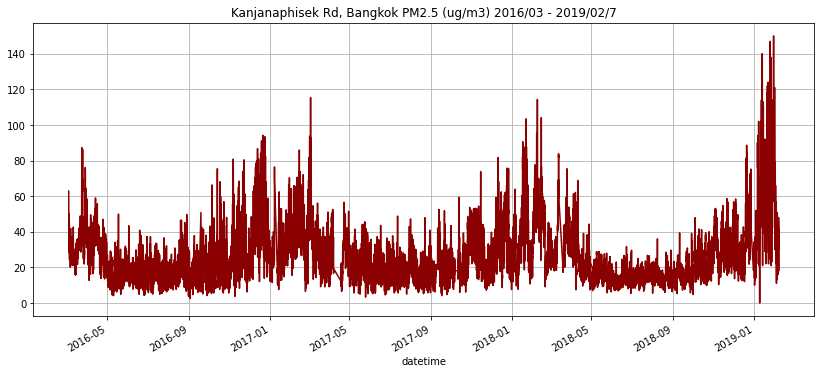

In [5]:
df.drop(columns=['PM10_mask','Retrospective','datetime'],inplace=True)
df['PM2.5'].plot(figsize=(14,6),title="Kanjanaphisek Rd, Bangkok PM2.5 (ug/m3) 2016/03 - 2019/02/7", color='darkred', grid=True)
df.shape

<AxesSubplot:title={'center':'Bangkok PM2.5 Daily Maximum Yearly comparison (ug/m3)'}, xlabel='datetime'>

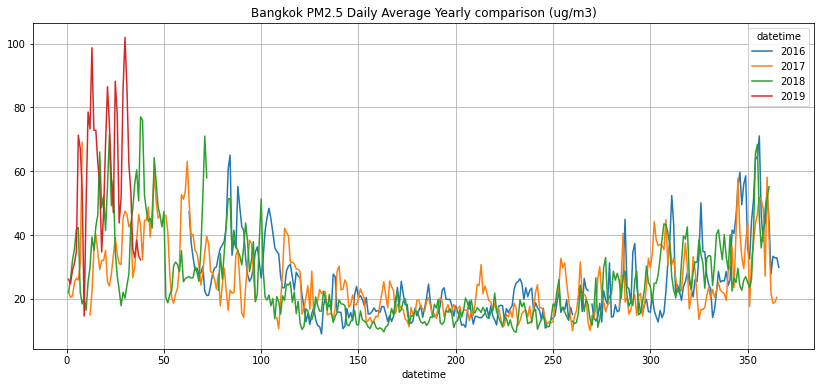

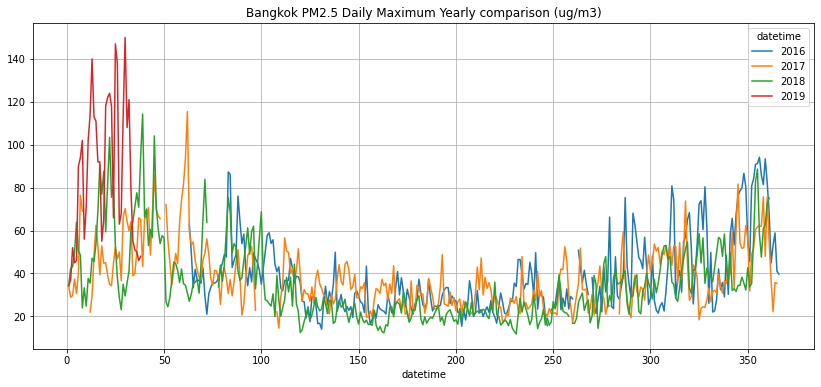

In [6]:
pv = pd.pivot_table(df, index=df.index.dayofyear, columns=df.index.year,
                    values='PM2.5', aggfunc='mean')
pv.plot(title="Bangkok PM2.5 Daily Average Yearly comparison (ug/m3)",figsize=(14,6), grid=True)

pv2 = pd.pivot_table(df, index=df.index.dayofyear, columns=df.index.year,
                    values='PM2.5', aggfunc='max')
pv2.plot(title="Bangkok PM2.5 Daily Maximum Yearly comparison (ug/m3)",figsize=(14,6), grid=True)

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T



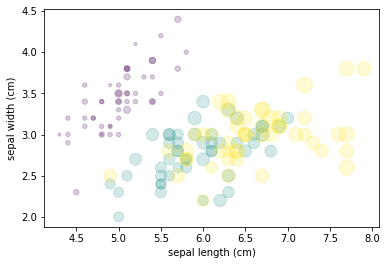

In [49]:
plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

In [11]:
df1 = df.copy()

In [69]:
df['PM2.5'].describe()
# 0- 50
# 50-100
# 100-150


count    23814.000000
mean        26.098018
std         15.769880
min          0.000000
25%         15.300000
50%         21.700000
75%         32.600000
max        150.000000
Name: PM2.5, dtype: float64

In [14]:
pd.cut(df1['PM2.5'], 3)

datetime
2016-03-03 15:00:00    (50.0, 100.0]
2016-03-03 16:00:00    (50.0, 100.0]
2016-03-03 17:00:00    (50.0, 100.0]
2016-03-03 18:00:00    (50.0, 100.0]
2016-03-03 19:00:00    (-0.15, 50.0]
                           ...      
2019-02-07 11:00:00    (-0.15, 50.0]
2019-02-07 12:00:00    (-0.15, 50.0]
2019-02-07 13:00:00    (-0.15, 50.0]
2019-02-07 14:00:00    (-0.15, 50.0]
2019-02-07 15:00:00    (-0.15, 50.0]
Name: PM2.5, Length: 23814, dtype: category
Categories (3, interval[float64, right]): [(-0.15, 50.0] < (50.0, 100.0] < (100.0, 150.0]]

In [55]:
label = ['< 50', '50-100', '100-150']
df1['Group'] = pd.cut(df1['PM2.5'], 3, labels = label)

In [113]:
df1.head()

,Year,Month,Day,Hour,PM2.5,Group
datetime,,,,,,
2016-03-03 15:00:00,2016,3,3,15,62.9,50-100
2016-03-03 16:00:00,2016,3,3,16,62.9,50-100
2016-03-03 17:00:00,2016,3,3,17,55.5,50-100
2016-03-03 18:00:00,2016,3,3,18,55.5,50-100
2016-03-03 19:00:00,2016,3,3,19,47.9,< 50


In [125]:
pm = df1['PM2.5'].values
GROUP = df1['Group'].values
GROUP_ = np.unique(GROUP)
time = df.index
GROUP_

array(['100-150', '50-100', '< 50'], dtype=object)

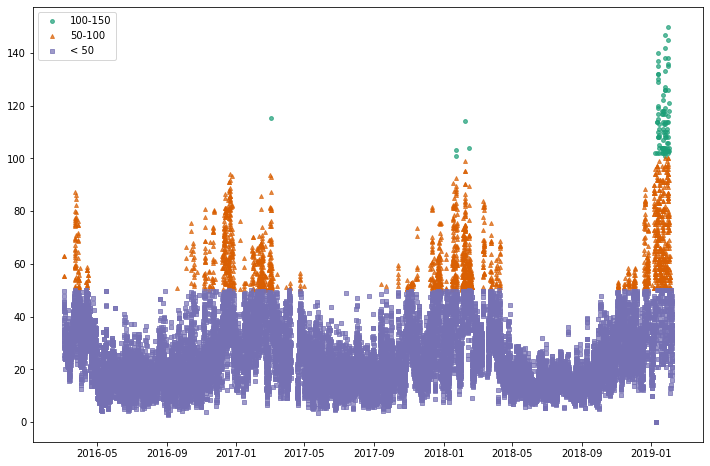

In [106]:
MARKERS = ["o", "^", "s"] # circle, triangle, square
COLORS = ["#1B9E77", "#D95F02", "#7570B3"]

fig, ax = plt.subplots(figsize=(12,8))

for group, color, marker in zip(GROUP_, COLORS, MARKERS):
    idxs = np.where(GROUP == group)
    ax.scatter(
        time[idxs], pm[idxs], label=group,
        s=15, color=color, marker=marker, alpha=0.7
    )
    
ax.legend();

(array([], dtype=int64),)

'< 50'

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
for group, color in zip(GROUP_, COLORS):
    idxs = np.where(GROUP == group)
    # No legend will be generated if we don't pass label=species
    ax.scatter(
        time[idxs], pm[idxs], label=group,
        s=5, color=color, alpha=0.7
    )
    
ax.legend();

In [99]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Low', 'Medium', 'High']

In [100]:
pie = pd.cut(df1['PM2.5'], 3, labels = labels).value_counts()

In [102]:
pie

Low       22006
Medium     1717
High         91
Name: PM2.5, dtype: int64

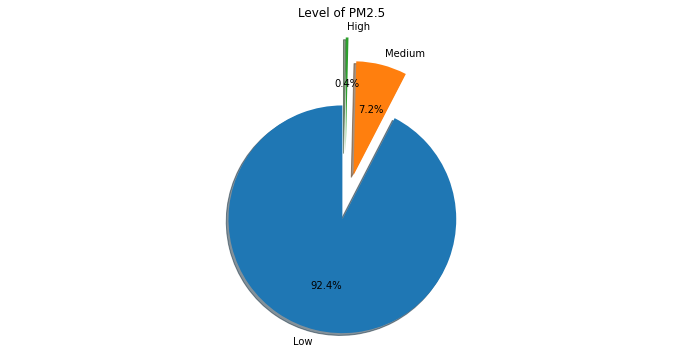

In [104]:

# Explode out the 'Chemical' pie piece by offsetting it a greater amount
explode = (0.1, 0.3, 0.5)

fig, ax = plt.subplots(figsize = (12,6))
ax.pie(pie,
       explode=explode,
       labels=labels,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Level of PM2.5')


plt.show()